In [36]:
import geopandas as gpd
import pandas as pd
import numpy as np
from numpy import mean
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
gdf = gpd.read_file('data clean\estaciones_comp.shp')



In [3]:
gdf = gpd.read_file('data clean\estaciones_comp.shp')


l = gdf.columns.to_list()
l.remove('geometry')
print(l)
for i in l:

    gdf[i] = gdf[i].astype("string")

print(gdf.dtypes)
gdf.head(3)

['Name', 'nom', 'estado', 'lab', 'link']
Name          string
nom           string
estado        string
lab           string
link          string
geometry    geometry
dtype: object


,Name,nom,estado,lab,link,geometry
0,1004,CAÑADA%20HONDA,AGUASCALIENTES,AGS,http://clicom-mex.cicese.mx/tmp/1004-CAÑADA%20...,POINT Z (-102.19890 22.00080 1925.00000)
1,1005,PRESA%20EL%20NIAGARA,AGUASCALIENTES,AGS,http://clicom-mex.cicese.mx/tmp/1005-PRESA%20E...,POINT Z (-102.37170 21.78060 1844.00000)
2,1008,PUERTO%20DE%20LA%20CONCEPCION,AGUASCALIENTES,AGS,http://clicom-mex.cicese.mx/tmp/1008-PUERTO%20...,POINT Z (-102.13500 22.20280 2322.80000)


In [4]:

def get_df(estation):

    try:
        N = gdf[gdf['Name']== estation].index[0]

        df = pd.read_csv(gdf.loc[N,'link'], skiprows=7 )

        for i in df.index:
            df.loc[i,'fecha'] = pd.to_datetime(str(df.loc[i,'Mes']) +'/'+ str(df.loc[i,'Día']) +'/'+ str(df.loc[i,'Anio']))  

        df.set_index('fecha', inplace = True)

        df = df.drop(['Mes','Día','Anio'], axis=1)
    except:
        print('error')


    return df


def plot_station(df):

    try:
        fig = px.line(df, x=df.index ,y='Datos')
        # Add range slider
        fig.update_layout(
            xaxis=dict(
                rangeselector=dict(
                    buttons=list([
                        dict(count=1,
                             label="1m",
                             step="month",
                             stepmode="backward"),
                        dict(count=6,
                             label="6m",
                             step="month",
                             stepmode="backward"),
                        dict(count=1,
                             label="YTD",
                             step="year",
                             stepmode="todate"),
                        dict(count=1,
                             label="1y",
                             step="year",
                             stepmode="backward"),
                        dict(step="all")
                    ])
                ),
                rangeslider=dict(
                    visible=True
                ),
                type="date"
            )
        )

        fig.show()
    except:
        print("no se pudo... :'v checa la estacion")


def periodos_faltante(est):
    dd =[]
    ondas= pd.DataFrame(columns=['inicio','final','no_dias'])

    for i in range(0,len(est)):
        
        if np.isnan(est.iloc[i,0]):

            dd.append(est.iloc[i,0])
        else:
            if len(dd)>0 : 

                rr={'inicio':est.iloc[i-len(dd)].name,
                    'final':est.iloc[i-1].name, 
                    'no_dias':len(dd) }

                ondas = ondas.append(rr, ignore_index=True)

            dd=[]

    return ondas


In [5]:
est = get_df('1008')
est.head(3)

,Datos
fecha,
1959-07-01,NaN
1959-07-02,NaN
1959-07-03,NaN


In [6]:
#plot_station(est)

In [7]:
pd.isnull(est['Datos']).sum()

280

In [8]:
'falta el {} % de los datos'.format(round((pd.isnull(est['Datos']).sum()/len(est))*100, 3))

'falta el 1.339 % de los datos'

* obtener cuantos periodos vacios
* promedio de longitud de periodos vacios
* el periodo mas largo
    




In [9]:
np.isnan(est.iloc[0,0])

True

In [10]:


    
def periodos_foc(est, foc):
    dd =[]
    ondas= pd.DataFrame(columns=['inicio','final','no_dias'])

    if foc == 'faltantes':

        for i in range(0,len(est)):

            if np.isnan(est.iloc[i,0]):

                dd.append(est.iloc[i,0])
            else:
                if len(dd)>0 : 

                    rr={'inicio':est.iloc[i-len(dd)].name,
                        'final':est.iloc[i-1].name, 
                        'no_dias':len(dd) }

                    ondas = ondas.append(rr, ignore_index=True)

                dd=[]
        ondas['%']= (ondas['no_dias']/len(est))*100
                
        return ondas

    elif foc == 'completos':

        for i in range(0,len(est)):

            if ~np.isnan(est.iloc[i,0]):

                dd.append(est.iloc[i,0])
            else:
                if len(dd)>0 : 

                    rr={'inicio':est.iloc[i-len(dd)].name,
                        'final':est.iloc[i-1].name, 
                        'no_dias':len(dd) }

                    ondas = ondas.append(rr, ignore_index=True)

                dd=[]
        ondas['%']= (ondas['no_dias']/len(est))*100
        return ondas




In [11]:
falt  = periodos_foc(est, 'faltantes')
comp = periodos_foc(est, 'completos')

C:\Users\SIG01\AppData\Local\Temp\ipykernel_17872\1466004728.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ondas = ondas.append(rr, ignore_index=True)
C:\Users\SIG01\AppData\Local\Temp\ipykernel_17872\1466004728.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ondas = ondas.append(rr, ignore_index=True)
C:\Users\SIG01\AppData\Local\Temp\ipykernel_17872\1466004728.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ondas = ondas.append(rr, ignore_index=True)
C:\Users\SIG01\AppData\Local\Temp\ipykernel_17872\1466004728.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ondas = ondas.append(rr, ignore_index=True)
C:\Users\SIG

In [12]:
falt

,inicio,final,no_dias,%
0,1959-07-01,1959-07-14,14,0.066947
1,1962-08-01,1962-08-18,18,0.086075
2,1969-10-31,1969-10-31,1,0.004782
3,1980-06-30,1980-06-30,1,0.004782
4,2014-05-01,2014-12-31,245,1.171576
5,2015-10-27,2015-10-27,1,0.004782


In [13]:
comp

,inicio,final,no_dias,%
0,1959-07-15,1962-07-31,1113,5.322303
1,1962-08-19,1969-10-30,2630,12.576511
2,1969-11-01,1980-06-29,3894,18.620888
3,1980-07-01,2014-04-30,12357,59.090474
4,2015-01-01,2015-10-26,299,1.429801


<AxesSubplot:xlabel='fecha'>

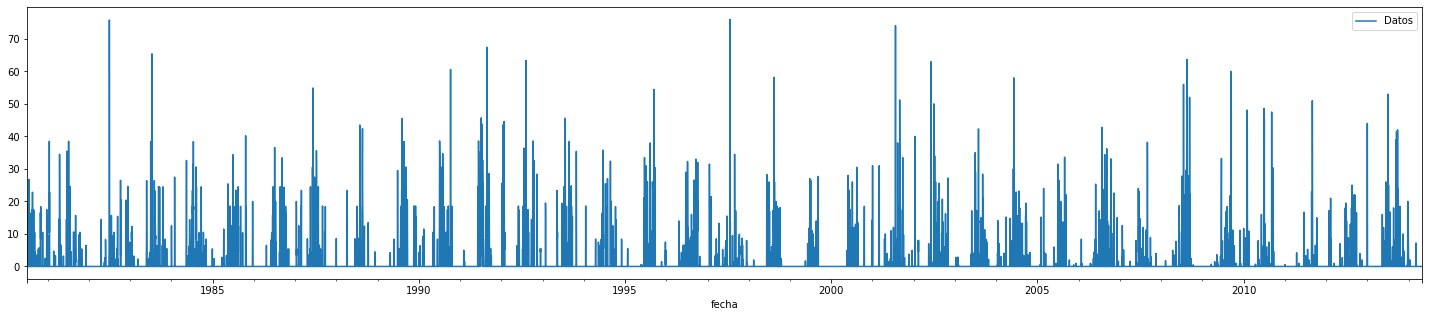

In [14]:
est.loc['1980-07-01':'2014-04-30',].plot(figsize=(25,5))

In [15]:
len(est)

20912

In [16]:
est.loc['1959-07-01', 'Datos']

nan

In [17]:
idx  = est.index.get_loc('1980-06-30')
print(est.iloc[idx-1,0])
print(est.iloc[idx,0])
print(est.iloc[idx+1,0])

print(  (est.iloc[idx-1,0] + est.iloc[idx+1,0])/2)

0.0
nan
0.0
0.0


In [18]:
falt

,inicio,final,no_dias,%
0,1959-07-01,1959-07-14,14,0.066947
1,1962-08-01,1962-08-18,18,0.086075
2,1969-10-31,1969-10-31,1,0.004782
3,1980-06-30,1980-06-30,1,0.004782
4,2014-05-01,2014-12-31,245,1.171576
5,2015-10-27,2015-10-27,1,0.004782


In [19]:
#relleno de los que solo son un dia con el promedio del dia anterior con el dia posterior

for i in falt.index:
    
    if falt.loc[i,'no_dias'] == 1: 
        print(i)
        idx  = est.index.get_loc(falt.loc[i,'inicio'])
        print(idx)
        est.iloc[idx,0] = (est.iloc[idx-1,0]+est.iloc[idx+1,0])/2
        print('+++++++++++++++++++++++')
        print(est.iloc[idx-1,0])
        print(est.iloc[idx+1,0])
        print((est.iloc[idx-1,0]+est.iloc[idx+1,0])/2)
        
        print('----------------------')
        

2
3775
+++++++++++++++++++++++
0.0
0.0
0.0
----------------------
3
7670
+++++++++++++++++++++++
0.0
0.0
0.0
----------------------
5
20572
+++++++++++++++++++++++
0.0
2.8
1.4
----------------------


In [20]:
falt2  = periodos_foc(est, 'faltantes')
comp2 = periodos_foc(est, 'completos')

C:\Users\SIG01\AppData\Local\Temp\ipykernel_17872\1466004728.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ondas = ondas.append(rr, ignore_index=True)
C:\Users\SIG01\AppData\Local\Temp\ipykernel_17872\1466004728.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ondas = ondas.append(rr, ignore_index=True)
C:\Users\SIG01\AppData\Local\Temp\ipykernel_17872\1466004728.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ondas = ondas.append(rr, ignore_index=True)
C:\Users\SIG01\AppData\Local\Temp\ipykernel_17872\1466004728.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ondas = ondas.append(rr, ignore_index=True)
C:\Users\SIG

In [21]:
falt2

,inicio,final,no_dias,%
0,1959-07-01,1959-07-14,14,0.066947
1,1962-08-01,1962-08-18,18,0.086075
2,2014-05-01,2014-12-31,245,1.171576


In [22]:
comp2

,inicio,final,no_dias,%
0,1959-07-15,1962-07-31,1113,5.322303
1,1962-08-19,2014-04-30,18883,90.297437


In [23]:
comp2[ comp2['no_dias'] == comp2['no_dias'].max()]

,inicio,final,no_dias,%
1,1962-08-19,2014-04-30,18883,90.297437


In [24]:
rango = [comp2[ comp2['no_dias'] == comp2['no_dias'].max()].iloc[0,0],comp2[ comp2['no_dias'] == comp2['no_dias'].max()].iloc[0,1]]
rango

[Timestamp('1962-08-19 00:00:00'), Timestamp('2014-04-30 00:00:00')]

In [25]:
complete_range = est.loc[rango[0]:rango[1],]

In [26]:
train = complete_range.iloc[0:int(len(est)*0.75), :] 
print(len(train))

test = complete_range.iloc[int(len(est)*0.75): len(est), :]
print(len(test)) 

15684
3199


<AxesSubplot:xlabel='fecha'>

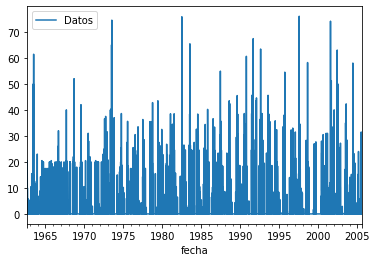

In [27]:
train.plot()

<AxesSubplot:xlabel='fecha'>

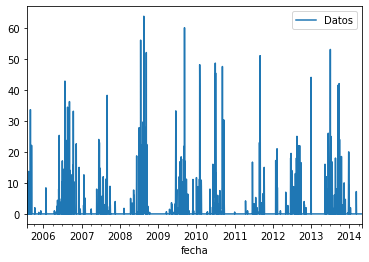

In [28]:
test.plot()

In [29]:
print(train.tail(3))
print(test.head(3))

            Datos
fecha            
2005-07-25   14.0
2005-07-26    0.5
2005-07-27   20.0
            Datos
fecha            
2005-07-28    0.8
2005-07-29    0.0
2005-07-30    0.0


In [30]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

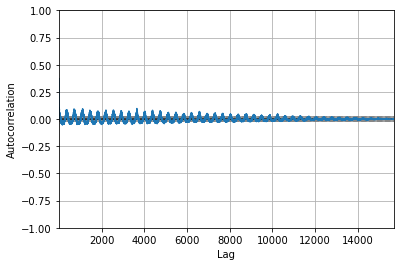

In [31]:
autocorrelation_plot(train)

In [33]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

In [34]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 7
                )

forecaster.fit(y=train['Datos'])
forecaster

c:\Users\SIG01\.conda\envs\gpd_env\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
c:\Users\SIG01\.conda\envs\gpd_env\lib\site-packages\skforecast\utils\utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6 7] 
Window size: 7 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 15683] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-08-17 16:16:17 
Last fit date: 2022-08-17 16:16:19 
Skforecast version: 0.4.3 

In [50]:
steps = 365
predictions = forecaster.predict(steps=steps)
predictions.head(5)

15684    11.9290
15685     7.7190
15686     5.8898
15687     7.5530
15688    11.8000
Name: pred, dtype: float64

<AxesSubplot:>

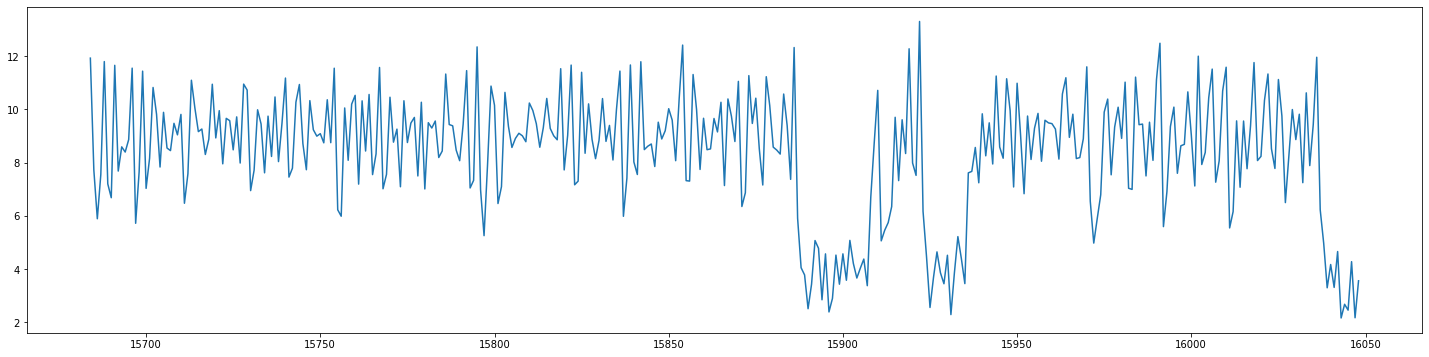

In [54]:
predictions.plot(figsize=(25,6))

TypeError: index type not supported

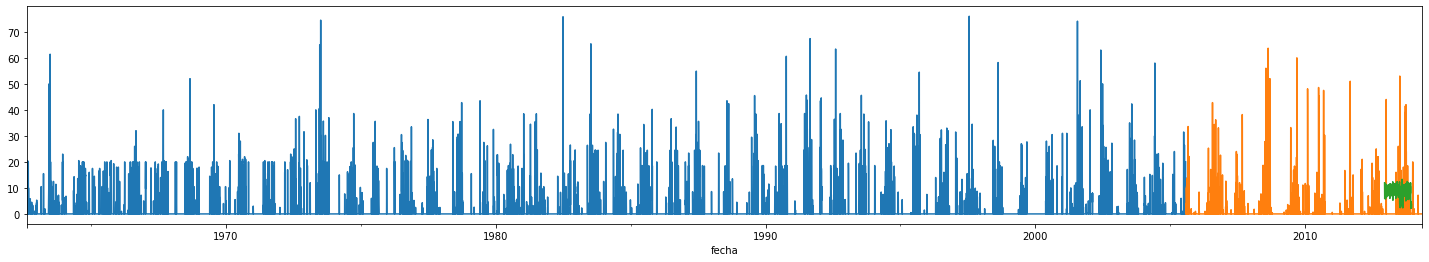

In [52]:
fig, ax = plt.subplots(figsize=(25, 4))
train['Datos'].plot(ax=ax, label='train')

test['Datos'].plot(ax=ax, label='test')

predictions.plot(ax=ax, label='predictions')
ax.legend()